# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Arianto Blawa Maran
- **Email:** ariantobm16@gmail.com
- **ID Dicoding:** ariantobm

## Pertanyaan Bisnis

- Bagaimana jumlah pembelian tiap bulan?
- Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir?
- Produk apa yang memiliki penjualan tertinggi dan terendah?
- Bagaimana tingkat kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import datetime as dt

## Data Wrangling

### gathering data

In [2]:
df_customers = pd.read_csv('data/customers_dataset.csv')
df_geolocation = pd.read_csv('data/geolocation_dataset.csv')
df_order_item = pd.read_csv('data/order_items_dataset.csv')
df_order_payments = pd.read_csv('data/order_payments_dataset.csv')
df_order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
df_orders = pd.read_csv('data/orders_dataset.csv')
df_product_category = pd.read_csv('data/product_category_name_translation.csv')
df_products = pd.read_csv('data/products_dataset.csv')
df_sellers = pd.read_csv('data/sellers_dataset.csv')

In [3]:
df_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
df_order_item.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
df_order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
df_product_category.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
df_sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### customers

In [12]:
print(df_customers.info())
print(df_customers.isna().sum())
print('Duplicate: ', df_customers.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicate:  0


In [13]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Geolocation

In [14]:
print(df_geolocation.info())
print(df_geolocation.isna().sum())
print('Duplicate: ', df_geolocation.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicate:  261831


In [15]:
df_geolocation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


#### Order items

In [16]:
print(df_order_item.info())
print(df_order_item.isna().sum())
print('Duplicate: ', df_order_item.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicate:  0


In [17]:
df_geolocation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


#### Order payments

In [18]:
print(df_order_payments.info())
print(df_order_payments.isna().sum())
print('Duplicate: ', df_order_payments.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicate:  0


In [19]:
df_order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Order reviews

In [20]:
print(df_order_reviews.info())
print(df_order_reviews.isna().sum())
print('Duplicate: ', df_order_reviews.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Duplicate:  0


In [21]:
df_order_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### Orders

In [22]:
print(df_orders.info())
print(df_orders.isna().sum())
print('Duplicate: ', df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

In [23]:
df_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Product Category Name

In [24]:
print(df_product_category.info())
print(df_product_category.isna().sum())
print('Duplicate: ', df_product_category.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
product_category_name            0
product_category_name_english    0
dtype: int64
Duplicate:  0


In [25]:
df_product_category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Products

In [26]:
print(df_products.info())
print(df_products.isna().sum())
print('Duplicate: ', df_products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
prod

In [27]:
df_products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


#### Sellers

In [28]:
print(df_sellers.info())
print(df_sellers.isna().sum())
print('Duplicate: ', df_sellers.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Duplicate:  0


In [29]:
df_sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Cleaning Data

In [30]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

In [31]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

In [32]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    df_order_item[col]=pd.to_datetime(df_order_item[col])

In [33]:
df_geolocation.duplicated().sum()

261831

In [34]:
df_geolocation.drop_duplicates(inplace=True)

In [35]:
df_geolocation.duplicated().sum()

0

In [36]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [37]:
df_order_reviews.fillna({'review_comment_title': 'No Title'}, inplace=True)
df_order_reviews.fillna({'review_comment_message': 'No Message'}, inplace=True)

In [38]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [39]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Customers

In [41]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [42]:
df_customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Explore Geolocation

In [43]:
(df_geolocation['geolocation_city']=='são paulo').sum()

19718

In [44]:
df_geolocation['geolocation_city']=df_geolocation['geolocation_city'].apply(lambda x: unidecode(x))

In [45]:
(df_geolocation['geolocation_city']=='são paulo').sum()

0

In [46]:
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6345,jordao,CE,1
6346,silves,AM,1
6347,california da barra (barra do pirai),RJ,1
6348,calheiros,RJ,1


In [47]:
df_order_payments.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

#### Menggabungkan df_customers & df_orders

In [48]:
cust_orders_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

### ,Menggabungkan df_products && df_product_category

In [49]:
new_df_products=pd.merge(
    left=df_products,
    right=df_product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [50]:
col = new_df_products.pop('product_category_name_english')
new_df_products.insert(2, col.name, col)

In [51]:
m1=pd.merge(
    left=cust_orders_df,
    right=df_order_payments,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [52]:
m2=pd.merge(
    left=m1,
    right=df_order_item,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [53]:
m3=pd.merge(
    left=m2,
    right=new_df_products,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

In [54]:
m4=pd.merge(
    left=m3,
    right=df_sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
all_df=pd.merge(
    left=m4,
    right=df_order_reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [57]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118310.000000,118310,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,2018-01-05 22:06:13.308807680,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,2017-09-18 14:30:33,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,2018-01-25 04:11:15.500000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,2018-05-10 02:51:40.249999872,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,NaN,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


### RFM

In [58]:
all_df['order_purchase_timestamp'].max()


Timestamp('2018-10-17 17:30:18')

In [59]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [60]:
#Y-M-D
now=dt.datetime(2018,10,20)
#now=dt.datetime(2018,9,3)

In [61]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [62]:
""" all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

rfm = all_df.groupby('customer_id',as_index=False).agg({
     'order_purchase_timestamp' : lambda x : (now - x.max()).days,
    'order_id': lambda x : len(x),
    'price': lambda x : x.sum() 
}) """


" all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])\n\nrfm = all_df.groupby('customer_id',as_index=False).agg({\n     'order_purchase_timestamp' : lambda x : (now - x.max()).days,\n    'order_id': lambda x : len(x),\n    'price': lambda x : x.sum() \n}) "

In [63]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [64]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

In [65]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,2,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50


In [66]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [67]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,274,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,218,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,434,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,166,1,0.00


In [68]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


In [69]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,160,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,258,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,458,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,164,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,537,1,139.90


In [70]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',
       
}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

In [71]:
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',
       
}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

In [72]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


In [73]:
all_df=pd.merge(
    left=all_df,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)

In [74]:
all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
12003,b240cbf2b50a10ee1f80b42c56b99069,c47ec91fad63554dd8fe3e33188faf7d,36026,juiz de fora,MG,9fb81511dfc1d6959ed1052930efd8a6,delivered,2018-07-17 11:16:54,2018-07-17 11:30:21,2018-07-17 14:19:00,2018-07-24 01:03:27,2018-08-06,1.0,credit_card,8.0,511.43,1.0,040fe1cdb263eb2c9b1322875b0afcb7,fe2032dab1a61af8794248c8196565c9,2018-07-23 11:30:21,489.90,21.53,perfumaria,perfumery,36.0,561.0,1.0,2303.0,26.0,15.0,23.0,13030.0,campinas,SP,d723ed1c62eb4a87f7935b823cecad07,1.0,No Title,No Message,2018-08-19,2018-08-20 12:36:35,94,1,489.90
113646,abd10efcba52884626c22cdca7dba539,9f4c36aa1686f840116ee318a5f32b11,15320,floreal,SP,451fbdf4d10b8d3d4da3f5d226bc5ae9,delivered,2017-08-07 16:20:45,2017-08-07 16:43:45,2017-08-08 20:45:56,2017-08-17 18:25:28,2017-08-29,1.0,credit_card,2.0,30.00,1.0,62b40d45d531e2cb8b06d7188b627f3d,537eb890efff034a88679788b647c564,2017-08-11 16:43:45,14.90,15.10,moveis_decoracao,furniture_decor,56.0,493.0,3.0,100.0,16.0,3.0,23.0,20270.0,rio de janeiro,RJ,5f11a46583fa3c951194c8201969215c,5.0,No Title,No Message,2017-08-18,2017-08-19 00:59:03,438,1,14.90
34077,59671c3de58dc1bcbbb7ad274537ac20,c7483147fb9cc65b26e2abac506a9fe0,60521,fortaleza,CE,ceeaf57b8e4f3315fffae525ec8018e0,delivered,2018-05-13 15:32:37,2018-05-13 15:52:06,2018-05-14 13:57:00,2018-05-17 16:34:40,2018-06-08,1.0,credit_card,4.0,43.32,1.0,dab2413ead0edda9967edbc9bda2a64e,562fc2f2c2863ab7e79a9e4388a58a14,2018-05-17 15:52:06,29.99,13.33,telefonia,telephony,57.0,680.0,2.0,250.0,17.0,7.0,13.0,13070.0,campinas,SP,06e450af21e6a6607fa993785991bca6,4.0,No Title,No Message,2018-05-18,2018-05-20 16:12:29,159,1,29.99
62068,3dd8ceff216c5048e53be249aa622709,6cba2fea42066c8781a30cd92826317c,32280,contagem,MG,cbaa06517efa6c48a336a917c53e2561,delivered,2018-04-25 07:40:21,2018-04-26 10:34:00,2018-04-26 15:10:00,2018-05-03 17:05:14,2018-05-23,1.0,credit_card,7.0,2060.51,1.0,16c4e87b98a9370a9cbc3a4658a3f45b,d23019c84ffae2d5ef2270367b8605fc,2018-05-03 10:30:38,1890.00,170.51,instrumentos_musicais,musical_instruments,53.0,1935.0,1.0,18000.0,105.0,30.0,40.0,86073.0,londrina,PR,a00038427ff0a7cc00e46913907d67fa,4.0,Muito bom,Poderia ser excelente se o suporte não tivesse...,2018-05-04,2018-05-04 21:36:44,177,1,1890.00
57642,6d4b01823fdaba3e45b7d933041a8579,1d514d88794bb46123db575f387bf739,26535,nilopolis,RJ,321d9d09f4d1ffa67dd4ca76b9914da0,delivered,2017-11-04 20:27:39,2017-11-04 20:36:35,2017-11-07 18:47:34,2017-11-21 22:04:40,2017-12-05,1.0,credit_card,3.0,107.78,1.0,283dc451ad3918badb976d56ff887289,da8622b14eb17ae2831f4ac5b9dab84a,2017-11-14 20:35:35,89.90,17.88,cama_mesa_banho,bed_bath_table,58.0,188.0,1.0,1650.0,44.0,2.0,35.0,13405.0,piracicaba,SP,699be8563c7086a12f6a044a07210c70,5.0,No Title,"O jogo de lençol é lindo,foi entregue antes do...",2017-11-22,2017-11-24 23:57:52,349,1,89.90


In [75]:
all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah pembelian tiap bulan?

In [76]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40,521,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29,280,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59,153,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47,220,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,82,1,230.00


In [77]:
monthly_df = all_df.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df.head()

,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,984


In [78]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [79]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df.head()

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,984


In [80]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [81]:
monthly_df

,order_approved_at,order_count
12,September,5211
13,October,5630
15,December,6846
22,July,7234
21,June,7391
23,August,7672
17,February,8041
19,April,8075
20,May,8497
16,January,8541


In [82]:

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [83]:
monthly_df

,order_approved_at,order_count
16,January,8541
17,February,8041
18,March,8705
19,April,8075
20,May,8497
21,June,7391
22,July,7234
23,August,7672
12,September,5211
13,October,5630


In [84]:
monthly_df[monthly_df['order_count'] == monthly_df['order_count'].max()]['order_approved_at'].values[0]

'November'

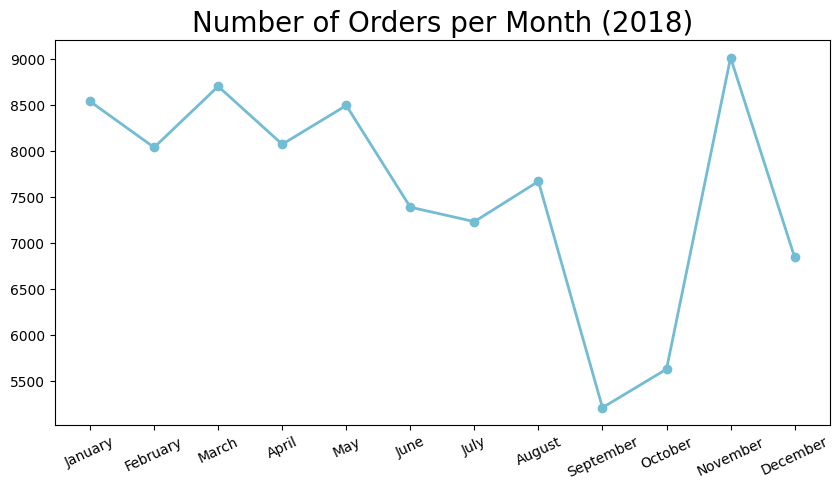

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir?

In [86]:
monthly_spend_df = all_df.resample(rule='ME', on='order_approved_at').agg({
    "payment_value":"sum"
})
monthly_spend_df.index = monthly_spend_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_spend_df = monthly_spend_df.reset_index()
monthly_spend_df.rename(columns={
    "payment_value":"total_spend"
}, inplace=True)
monthly_spend_df.head()

,order_approved_at,total_spend
0,September,0.00
1,October,75985.54
2,November,0.00
3,December,19.62
4,January,182178.36


In [87]:
monthly_spend_df = monthly_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

In [88]:
monthly_spend_df.head()

,order_approved_at,total_spend
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03


In [89]:
monthly_spend_df.sort_values(by='total_spend')

,order_approved_at,total_spend
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03
17,February,1314882.87
22,July,1334156.42
16,January,1406557.66
19,April,1476502.25
18,March,1500474.01


In [90]:
monthly_spend_df["month_numeric"] = monthly_spend_df["order_approved_at"].map(month_mapping)
monthly_spend_df = monthly_spend_df.sort_values("month_numeric")
monthly_spend_df = monthly_spend_df.drop("month_numeric", axis=1)

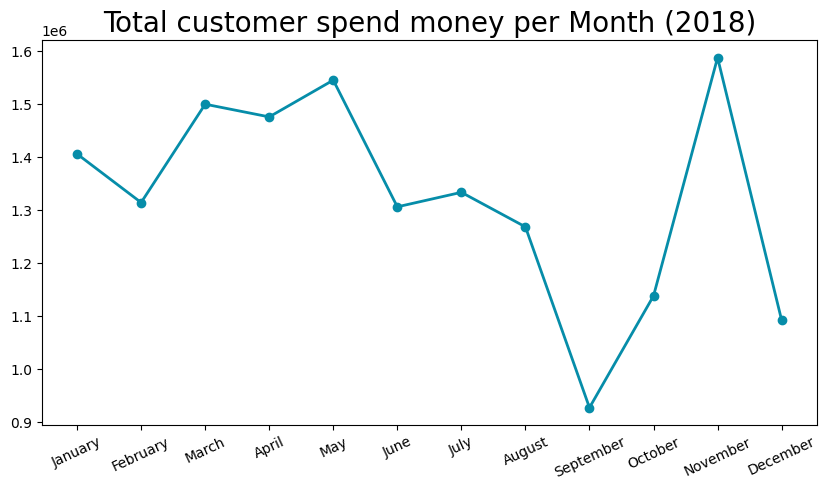

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_spend_df["order_approved_at"],
    monthly_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Total customer spend money per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 3: Produk apa yang memiliki penjualan tertinggi dan terendah?

In [92]:
sum_order_df = all_df.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_df = sum_order_df.rename(columns={"product_id": "products"})
sum_order_df = sum_order_df.sort_values(by="products", ascending=False)

In [93]:
sum_order_df.sort_values(by="products", ascending=True).head(5)

,product_category_name_english,products
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,14
52,la_cuisine,16
3,arts_and_craftmanship,24


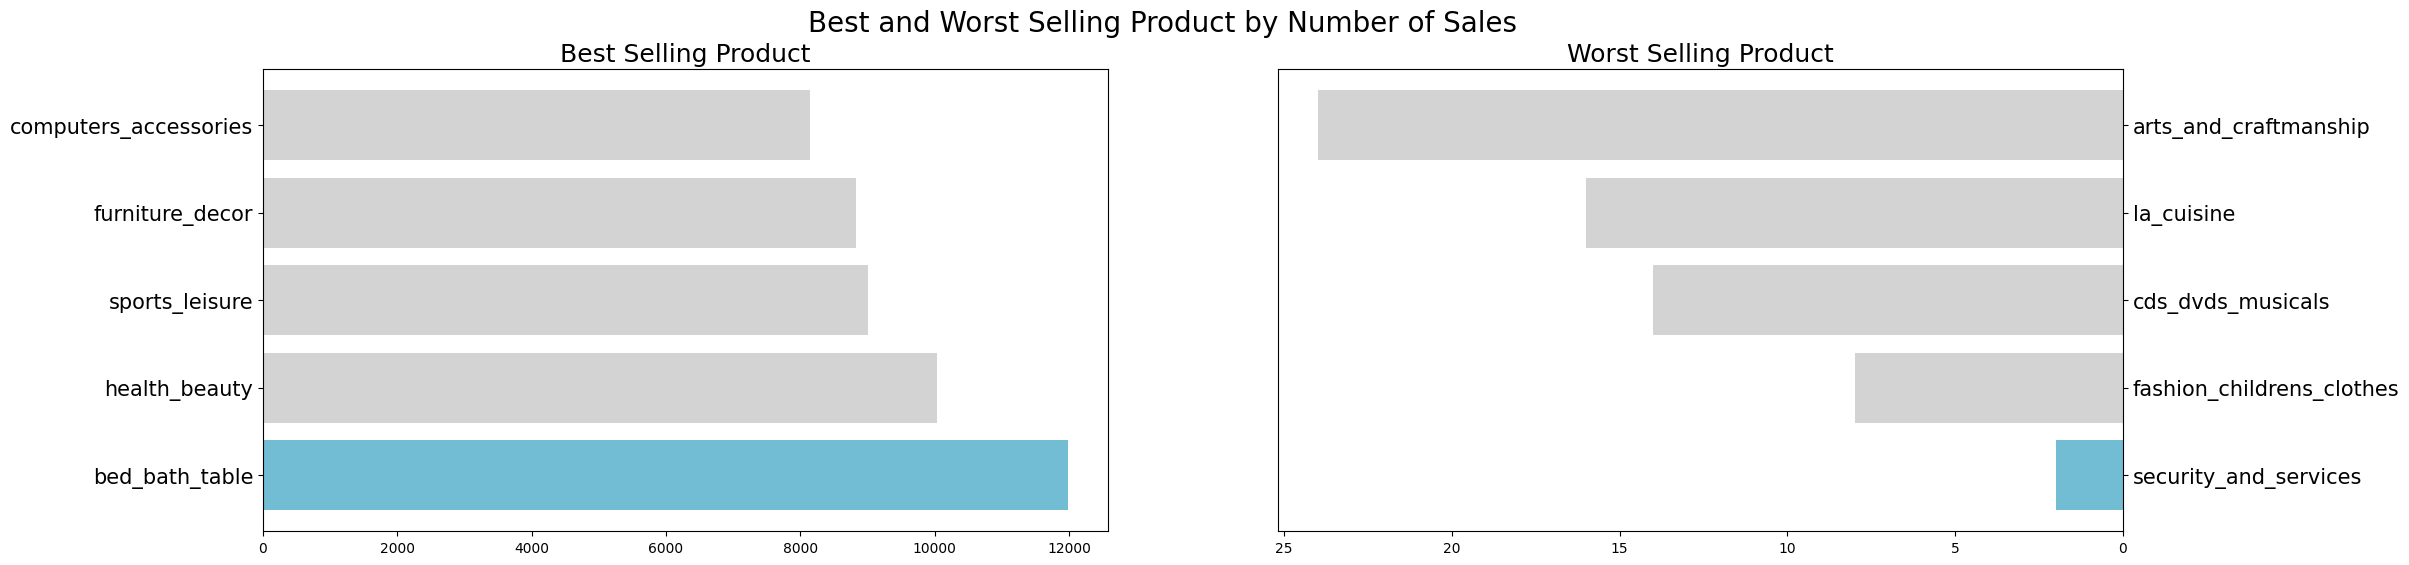

In [94]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk bar chart
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Misalkan `sum_order_df` sudah ada sebagai DataFrame
# Data untuk produk dengan penjualan terbaik (Best Selling Product)
best_selling = sum_order_df.head(5)
worst_selling = sum_order_df.sort_values(by="products", ascending=True).head(5)

# Plot Best Selling Product (ax[0])
ax[0].barh(best_selling['product_category_name_english'], best_selling['products'], color=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Product", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Plot Worst Selling Product (ax[1])
ax[1].barh(worst_selling['product_category_name_english'], worst_selling['products'], color=colors)
ax[1].invert_xaxis()  # Membalik sumbu x
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()  # Menampilkan label y di kanan
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Selling Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Menambahkan judul untuk kedua grafik
plt.suptitle("Best and Worst Selling Product by Number of Sales", fontsize=20)

# Menampilkan plot
plt.show()

### Pertanyaan 4: Bagaimana tingkat kepuasan pelanggan?

In [95]:
x=all_df['review_score'].value_counts().sort_values(ascending=False)

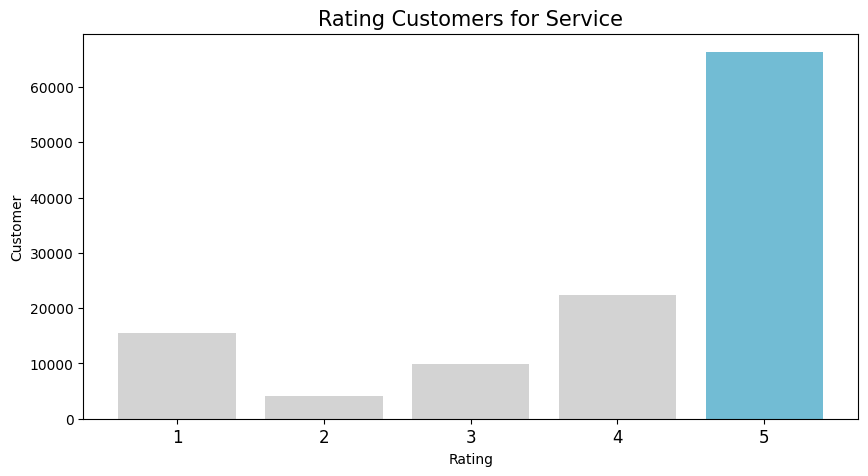

In [96]:
# Menghitung nilai rating
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)

# Mendapatkan nilai maksimum
max_score = rating_service.idxmax()

# Menyiapkan figure dan axis
plt.figure(figsize=(10, 5))

# Menentukan warna bar
colors = ["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_service.index]

# Membuat bar plot
plt.bar(rating_service.index, rating_service.values, color=colors)

# Mengatur judul dan label
plt.title("Rating Customers for Service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)

# Menampilkan plot
plt.show()

## Analisis Lanjutan

### RFM

In [97]:
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,339,1,89.80
1,000161a058600d5901f007fab4c27140,460,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,598,1,179.99
3,0002414f95344307404f0ace7a26f1d5,429,1,149.90
4,000379cdec625522490c315e70c7a9fb,200,1,93.00


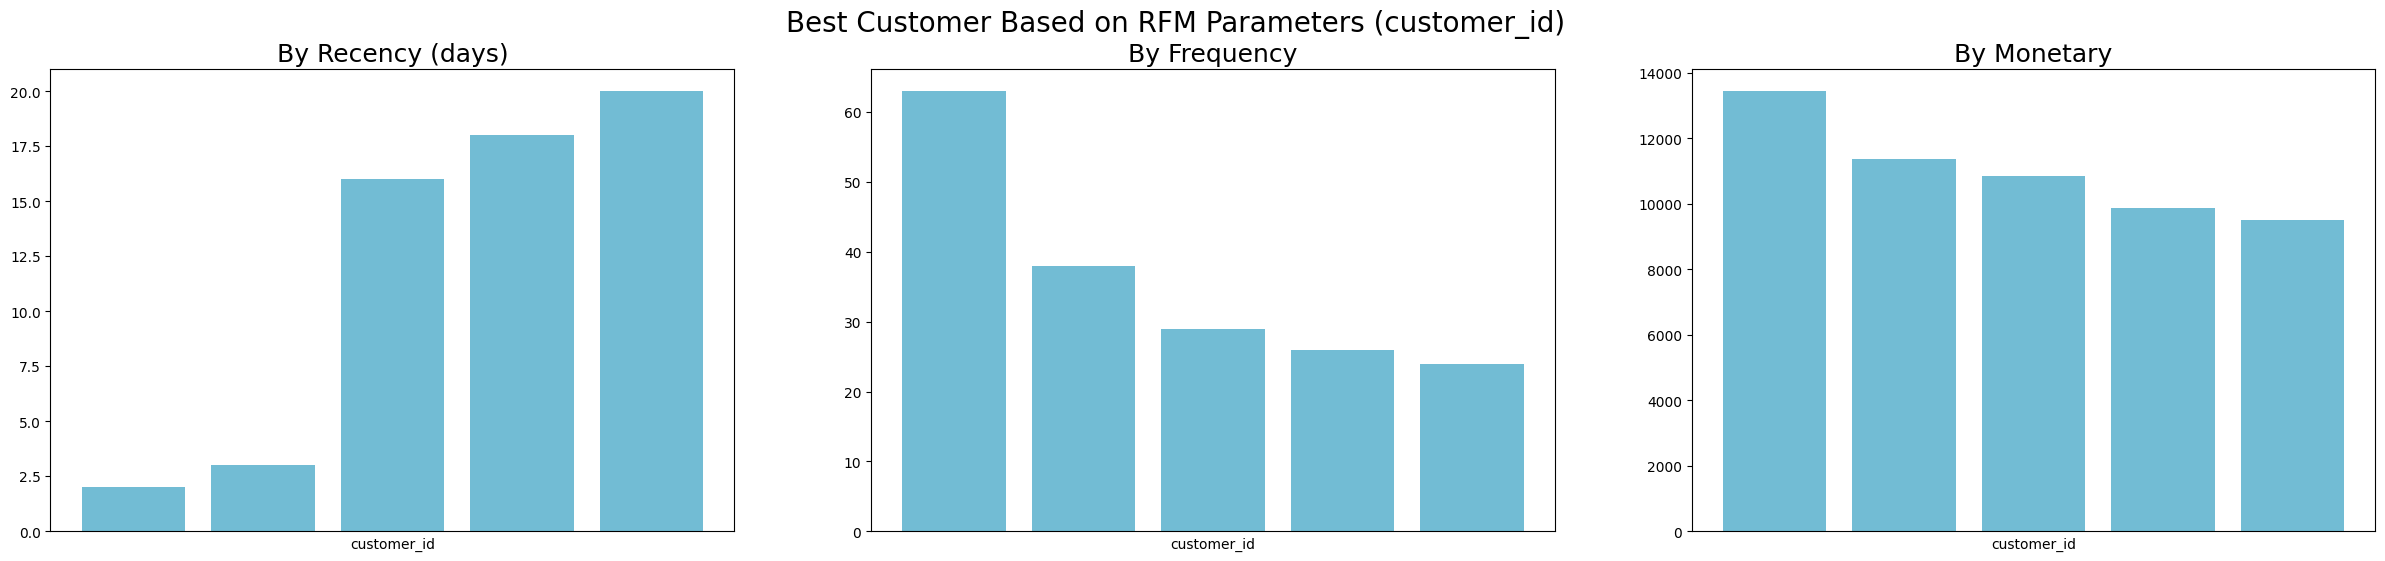

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk bar
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Data untuk Recency
recency_data = rfm.sort_values(by="Recency", ascending=True).head(5)
ax[0].bar(recency_data['customer_id'], recency_data['Recency'], color=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xlabel('customer_id')
ax[0].set_xticks([])

# Data untuk Frequency
frequency_data = rfm.sort_values(by="Frequency", ascending=False).head(5)
ax[1].bar(frequency_data['customer_id'], frequency_data['Frequency'], color=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xlabel('customer_id')
ax[1].set_xticks([])

# Data untuk Monetary
monetary_data = rfm.sort_values(by="Monetary", ascending=False).head(5)
ax[2].bar(monetary_data['customer_id'], monetary_data['Monetary'], color=colors)
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xlabel('customer_id')
ax[2].set_xticks([])

# Menambahkan judul untuk keseluruhan plot
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Answer

#### **Bagaimana jumlah pembelian tiap bulan?**

Pola pembelian pelanggan menunjukkan fluktuasi, di mana nilai pembelian setiap bulan mengalami kenaikan dan penurunan. Berdasarkan data, bulan November mencatat puncak pembelian maksimum, sedangkan bulan September mencatat puncak pembelian minimum.
 

#### **Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir?**

Pola spend yang dimiliki pelanggan cukup fluktuatif dengan terendah pada bulan September.

#### **Produk apa yang memiliki penjualan tertinggi dan terendah?**

Dari data yang telah divisualisasikan, produk beth_bad_table memiliki angka pembelian tertinggi, sedangkan produk security_and_service mencatatkan angka pembelian terendah.


#### **Bagaimana tingkat kepuasan pelanggan?**

Sebagian besar pelanggan menunjukkan tingkat kepuasan yang baik, yang dapat dilihat dari visualisasi data; banyak dari mereka memberikan rating tertinggi, yaitu 5, dengan nilai rata-rata sekitar 4 setelah dibulatkan.